In [694]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime

## Data Gathering

In [695]:
# Reading the dataset as a dataframe to work upon
data=pd.read_csv("1828175.csv")

In [696]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO systems,2019-02-19 00:00:00,2019.0,1.928711e+09,2019-02-01,20190130,20190201,20190216.0,USD,RV,1.0,NaN,92.43,20190201.0,NAA8,1.928711e+09,0
1,U001,0200726979,BJ'S trust,2019-01-29 00:00:00,2019.0,1.928622e+09,2019-01-14,20190114,20190114,20190129.0,USD,RV,1.0,NaN,178.22,20190114.0,NAA8,1.928622e+09,0
2,U001,0200126819,MCLANE co,2020-02-21 00:00:00,2020.0,1.930407e+09,2020-01-23,20200116,20200123,20200207.0,USD,RV,1.0,NaN,655.00,20200123.0,NAA8,1.930407e+09,0
3,U001,0200763229,MAINES associates,2019-09-18 00:00:00,2019.0,1.929823e+09,2019-09-03,20190903,20190903,20190918.0,USD,RV,1.0,NaN,15170.56,20190903.0,NAA8,1.929823e+09,0
4,U001,CCU013,KRAFT F llc,2019-03-29 00:00:00,2019.0,1.928750e+09,2019-02-06,20190206,20190206,20190206.0,USD,RV,1.0,NaN,9488.50,20190206.0,NAX2,1.928750e+09,0


In [697]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46039 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

**Inference** We can see that the variable like clear_date and due_in_date are not in correct format so we need to convert it to datetime format.

In [698]:
# coverting 'clear_date' to datetime format.
data['clear_date']=pd.to_datetime(data['clear_date'])
#'due_in_date' is in float but so we need to format it to datetime format.
data['due_in_date']=data['due_in_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
#'document_create_date.1' is in integer so we need to format it to datetime format.
data['document_create_date.1']=data['document_create_date.1'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [699]:
data.head() #one can observe the above column are converted to datetime format

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200714710,SYSCO systems,2019-02-19,2019.0,1.928711e+09,2019-02-01,20190130,2019-02-01,2019-02-16,USD,RV,1.0,NaN,92.43,20190201.0,NAA8,1.928711e+09,0
1,U001,0200726979,BJ'S trust,2019-01-29,2019.0,1.928622e+09,2019-01-14,20190114,2019-01-14,2019-01-29,USD,RV,1.0,NaN,178.22,20190114.0,NAA8,1.928622e+09,0
2,U001,0200126819,MCLANE co,2020-02-21,2020.0,1.930407e+09,2020-01-23,20200116,2020-01-23,2020-02-07,USD,RV,1.0,NaN,655.00,20200123.0,NAA8,1.930407e+09,0
3,U001,0200763229,MAINES associates,2019-09-18,2019.0,1.929823e+09,2019-09-03,20190903,2019-09-03,2019-09-18,USD,RV,1.0,NaN,15170.56,20190903.0,NAA8,1.929823e+09,0
4,U001,CCU013,KRAFT F llc,2019-03-29,2019.0,1.928750e+09,2019-02-06,20190206,2019-02-06,2019-02-06,USD,RV,1.0,NaN,9488.50,20190206.0,NAX2,1.928750e+09,0


In [700]:
# delay= clear_date - due_in_date
data['delay']=data['clear_date']-data['due_in_date']
data['delay']# validating if it is comming correct or not

0        3 days
1        0 days
2       14 days
3        0 days
4       51 days
          ...  
49995       NaT
49996       NaT
49997       NaT
49998       NaT
49999       NaT
Name: delay, Length: 50000, dtype: timedelta64[ns]

**Inference** after gathering data and observing the PRS document we came to conclusion that we are not provided with the target variable we need to derive it by making a new column 'delay'.

In [701]:
#we need to sort the data according to its creation date .
data.sort_values(by=['document_create_date.1'],inplace=True)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
3987,CA02,0100054173,DIA corporation,2019-09-25,2019.0,9.500000e+09,2019-03-29,20190329,2018-12-21,2018-12-31,CAD,X2,1.0,NaN,255.00,20181221.0,CA10,NaN,0,268 days
28512,U001,0200726979,BJ'S,2019-01-15,2019.0,1.928538e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,139.69,20181230.0,NAA8,1.928538e+09,0,1 days
23669,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928538e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,882.33,20181230.0,NAH4,1.928538e+09,0,-5 days
38468,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928537e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,146.25,20181230.0,NAA8,1.928537e+09,0,1 days
38432,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,21202.06,20181230.0,NAH4,1.928533e+09,0,-5 days


##  Splitiing the data

Here we will split the data into 4 parts in the following way:
1. test set in which will contain all the values where the clear_date column is null.
2. train set which will be used to train our machine learning model.
3. val1 which will be used for hyperparameter tuning of our model.
4. val2 which will act as a local tester and we will know how our model is performing by this set.

In [702]:
data.isnull().sum() #viewing how many values are null and in which column

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3961
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
delay                      3961
dtype: int64

**Inference** We can observe that we have a total of 4434 rows in which clear_date is null and these columns will be our test set

In [843]:
#making test_set in which the clear_date column is null. 
# Split 1.
test_set=data[(data['clear_date'].isnull())]
test_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
46643,U001,0200705742,DOT co,NaT,2020.0,1.930578e+09,2020-02-27,20200227,2020-02-27,2020-03-30,USD,RV,1.0,NaN,14465.24,20200227.0,NA32,1.930578e+09,1,NaT
49615,U001,CCCA02,KRAFT trust,NaT,2020.0,1.930571e+09,2020-02-27,20200225,2020-02-27,2020-04-02,USD,RV,1.0,NaN,29376.00,20200227.0,NAG2,1.930571e+09,1,NaT
47527,U001,0200290370,BARGAIN associates,NaT,2020.0,1.930577e+09,2020-02-27,20200227,2020-02-27,2020-03-13,USD,RV,1.0,NaN,16462.80,20200227.0,NAA8,1.930577e+09,1,NaT
47285,U001,0200799367,MCL us,NaT,2020.0,1.930549e+09,2020-02-27,20200220,2020-02-27,2020-03-13,USD,RV,1.0,NaN,9975.34,20200227.0,NAA8,1.930549e+09,1,NaT
49321,U001,0200561861,CO co,NaT,2020.0,1.930567e+09,2020-02-27,20200225,2020-02-27,2020-03-13,USD,RV,1.0,NaN,32979.53,20200227.0,NAA8,1.930567e+09,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47947,U001,0200765011,MAINES associates,NaT,2020.0,1.930904e+09,2020-05-14,20200515,2020-05-14,2020-05-29,USD,RV,1.0,NaN,28049.25,20200514.0,NAA8,1.930904e+09,1,NaT
47295,CA02,0140104392,FLANAG trust,NaT,2020.0,2.960634e+09,2020-05-15,20200515,2020-05-15,2020-05-27,CAD,RV,1.0,NaN,5607.95,20200517.0,CA10,2.960634e+09,1,NaT
47452,U001,100030964,NATURA llc,NaT,2020.0,1.930898e+09,2020-05-16,20200513,2020-05-16,2020-05-31,USD,RV,1.0,NaN,14698.55,20200516.0,NAA8,1.930898e+09,1,NaT
48236,U001,0200763229,MAINES in,NaT,2020.0,1.930915e+09,2020-05-18,20200518,2020-05-18,2020-06-02,USD,RV,1.0,NaN,21362.82,20200518.0,NAA8,1.930915e+09,1,NaT


In [704]:
# this is the data remaining after making test set.
train=data[~(data['clear_date'].isnull())]

In [705]:
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
3987,CA02,0100054173,DIA corporation,2019-09-25,2019.0,9.500000e+09,2019-03-29,20190329,2018-12-21,2018-12-31,CAD,X2,1.0,NaN,255.00,20181221.0,CA10,NaN,0,268 days
28512,U001,0200726979,BJ'S,2019-01-15,2019.0,1.928538e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,139.69,20181230.0,NAA8,1.928538e+09,0,1 days
23669,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928538e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,882.33,20181230.0,NAH4,1.928538e+09,0,-5 days
38468,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928537e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,146.25,20181230.0,NAA8,1.928537e+09,0,1 days
38432,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,NaN,21202.06,20181230.0,NAH4,1.928533e+09,0,-5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6552,U001,0200103402,LIT systems,2020-03-12,2020.0,1.930572e+09,2020-02-26,20200226,2020-02-26,2020-03-12,USD,RV,1.0,NaN,11224.73,20200226.0,NAA8,1.930572e+09,0,0 days
2166,U001,0200418007,AM us,2020-03-13,2020.0,1.930548e+09,2020-02-27,20200220,2020-02-27,2020-03-13,USD,RV,1.0,NaN,4171.53,20200227.0,NAA8,1.930548e+09,0,0 days
6496,CA02,0140106408,WAL-M foundation,2020-03-18,2020.0,2.960617e+09,2020-02-27,20200227,2020-02-27,2020-03-09,CAD,RV,1.0,NaN,12740.33,20200228.0,CA10,2.960617e+09,0,9 days
29053,U001,0200762950,HAR systems,2020-03-13,2020.0,1.930579e+09,2020-02-27,20200227,2020-02-27,2020-03-13,USD,RV,1.0,NaN,17377.54,20200227.0,NAA8,1.930579e+09,0,0 days


In [706]:
import datetime as dt
train['delay'] = train['delay'].dt.days.astype('int64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [707]:
'''#making of two dataframes one has features named as x and another has target variable delay as y.
y=rest_set['delay']
x=rest_set.drop('delay',inplace=False,axis=1)
#checking shape of each dataframe
x.shape,y.shape,rest_set.shape'''

"#making of two dataframes one has features named as x and another has target variable delay as y.\ny=rest_set['delay']\nx=rest_set.drop('delay',inplace=False,axis=1)\n#checking shape of each dataframe\nx.shape,y.shape,rest_set.shape"

In [708]:
'''#spliting the data into train and test with training data being 70% and 30% for testing.
#split 2
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.3,random_state=0)
#checking the shape confirms the data is splited correctly in 70,30 percent for train and test respectively
x_train.shape,x_test.shape,y_train.shape,y_test.shape'''

'#spliting the data into train and test with training data being 70% and 30% for testing.\n#split 2\nx_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.3,random_state=0)\n#checking the shape confirms the data is splited correctly in 70,30 percent for train and test respectively\nx_train.shape,x_test.shape,y_train.shape,y_test.shape'

In [709]:
'''#here the testing part is again splited into two sets val1 for hyperparameter tuning and val2 for model testing in 
# equal amount i.e 50 % each which is 15% of total data.
# This is split 3 and 4.
x_val1,x_val2,y_val1,y_val2=train_test_split(x_test,y_test,shuffle=False,test_size=0.5,random_state=0)
x_val1.shape,x_val2.shape,y_val1.shape,y_val2.shape'''

'#here the testing part is again splited into two sets val1 for hyperparameter tuning and val2 for model testing in \n# equal amount i.e 50 % each which is 15% of total data.\n# This is split 3 and 4.\nx_val1,x_val2,y_val1,y_val2=train_test_split(x_test,y_test,shuffle=False,test_size=0.5,random_state=0)\nx_val1.shape,x_val2.shape,y_val1.shape,y_val2.shape'

In [710]:
'''train=pd.concat([x_train,y_train],axis=1)
val1=pd.concat([x_val1,y_val1],axis=1)
val2=pd.concat([x_val2,y_val2],axis=1)'''

'train=pd.concat([x_train,y_train],axis=1)\nval1=pd.concat([x_val1,y_val1],axis=1)\nval2=pd.concat([x_val2,y_val2],axis=1)'

In [711]:
train.shape#,val1.shape,val2.shape

(46039, 20)

## Data Preprocessing

### Constant Feature Removal

In [712]:
# as it can be seen posting_id is constant throughout the data hence it is a constant feature and is of no use in our 
# model so we can remove it.
data['posting_id'].unique()


array([1.])

In [713]:
#test_set.drop('posting_id', inplace=True, axis =1)

In [714]:
train.drop('posting_id', inplace=True, axis =1)
#val1.drop('posting_id', inplace=True, axis =1)
#val2.drop('posting_id', inplace=True, axis =1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [715]:
train.shape # ,val1.shape,val2.shape

(46039, 19)

**Inference** We have removed posting_id from all our different datasets after splitting as it has constant value througout the data and provide no usefull information.

In [716]:
data['area_business'].unique()

array([nan])

In [717]:
train.drop('area_business', inplace=True, axis =1)
#val1.drop('area_business', inplace=True, axis =1)
#val2.drop('area_business', inplace=True, axis =1)
#train.shape,val1.shape,val2.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Duplicate Column removal
 1. As document_create_date and document_create_date.1 is almost similar with .1 version being more normalised one so we will drop the 1st one 

In [718]:
train.drop('document_create_date', inplace=True, axis =1)
#val1.drop('document_create_date', inplace=True, axis =1)
#val2.drop('document_create_date', inplace=True, axis =1)
#train.shape,val1.shape,val2.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [719]:
train['isOpen'].unique()

array([0])

### Unuseful Column Removal

In [720]:
train.drop('isOpen', inplace=True, axis =1)
#val1.drop('isOpen', inplace=True, axis =1)
#val2.drop('isOpen', inplace=True, axis =1)
train.shape#,val1.shape,val2.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(46039, 16)

In [721]:
train.drop('invoice_id', inplace=True, axis =1)
#val1.drop('invoice_id', inplace=True, axis =1)
#val2.drop('invoice_id', inplace=True, axis =1)
train.shape#,val1.shape,val2.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(46039, 15)

In [722]:
train.drop('baseline_create_date', inplace=True, axis =1)
#val1.drop('baseline_create_date', inplace=True, axis =1)
#val2.drop('baseline_create_date', inplace=True, axis =1)
train.shape#,val1.shape,val2.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(46039, 14)

## Exploratory Data Analysis

### Univariate Analysis


In [723]:
train.describe()

,buisness_year,doc_id,total_open_amount,delay
count,46039.000000,4.603900e+04,46039.000000,46039.000000
mean,2019.131019,2.013603e+09,32208.407347,0.781707
std,0.337425,2.878465e+08,39885.854270,10.988403
min,2019.000000,1.928490e+09,0.630000,-89.000000
25%,2019.000000,1.929166e+09,4583.860000,-3.000000
50%,2019.000000,1.929725e+09,17166.110000,0.000000
75%,2019.000000,1.930209e+09,46654.365000,2.000000
max,2020.000000,9.500000e+09,729645.920000,287.000000


In [724]:
train.describe(include=np.object)

,business_code,cust_number,name_customer,posting_date,invoice_currency,document type,cust_payment_terms
count,46039,46039,46039,46039,46039,46039,46039
unique,6,1429,4187,422,2,2,74
top,U001,0200769623,WAL-MAR corp,2019-03-08,USD,RV,NAA8
freq,41575,10398,1050,194,42358,46035,18503


In [725]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,delay
3987,CA02,0100054173,DIA corporation,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,CAD,X2,255.00,CA10,268
28512,U001,0200726979,BJ'S,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,139.69,NAA8,1
23669,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,882.33,NAH4,-5
38468,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,146.25,NAA8,1
38432,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,21202.06,NAH4,-5


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     46039.000000
mean      32208.407347
std       39885.854270
min           0.630000
25%        4583.860000
50%       17166.110000
75%       46654.365000
max      729645.920000
Name: total_open_amount, dtype: float64

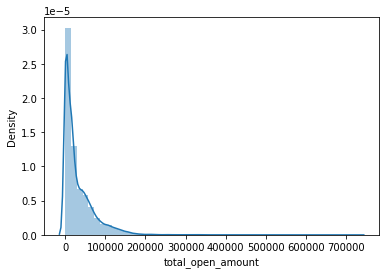

In [726]:
sns.distplot(train['total_open_amount'])
train['total_open_amount'].describe()

**Inference** We get some stats like --Data is skewed towards left

max value of open amount is - 32201<br>
75% - 46238<br>
median - 17079<br>
min - 1<br>
mean - 32201<br>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


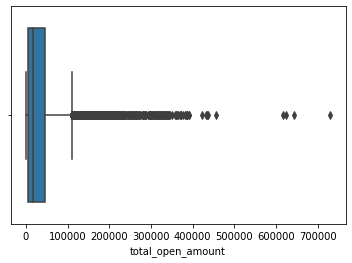

In [727]:
sns.boxplot(train.total_open_amount, orient = 'v')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


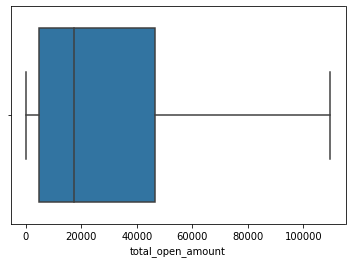

In [728]:
sns.boxplot(train.total_open_amount, orient = 'v',showfliers= False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    46039.000000
mean         0.781707
std         10.988403
min        -89.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        287.000000
Name: delay, dtype: float64

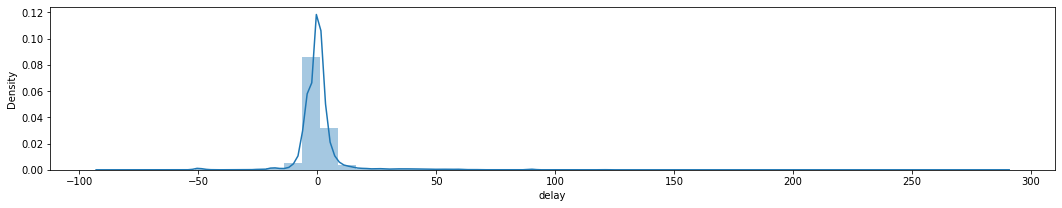

In [729]:
plt.figure(figsize=(18,3))
sns.distplot(train['delay'])
train['delay'].describe()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


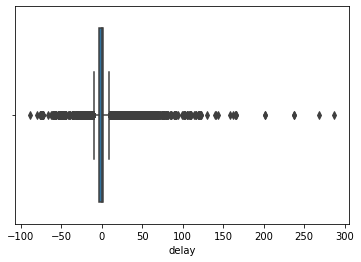

In [730]:

sns.boxplot(train.delay, orient = 'v')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


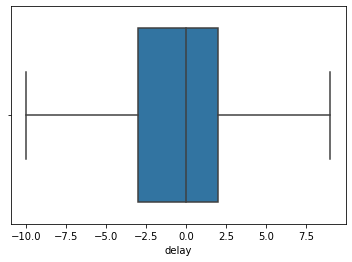

In [731]:
sns.boxplot(train.delay, orient = 'v',showfliers= False)

In [732]:
print(train['document type'].value_counts())
print(test_set['document type'].value_counts())
#print(train['document type'].value_counts())
#print(val1['document type'].value_counts())
#print(val2['document type'].value_counts())

RV    46035
X2        4
Name: document type, dtype: int64
RV    3961
Name: document type, dtype: int64


**Inference** It can be seen that X2 document type is very less as compared to RV and also it is not present in test set 

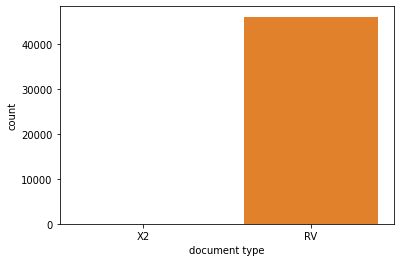

In [733]:
sns.countplot(x=train['document type'])

**Inference** One cant even see x2 in countplot as it is very low.

In [734]:
train['name_customer'].nunique()

4187

(array([40007.,  6032.]),
 array([2019. , 2019.5, 2020. ]),
 <a list of 2 Patch objects>)

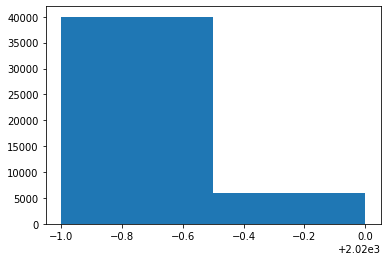

In [735]:
plt.hist(train['buisness_year'],bins=2)


**Inference** there are only two business year so we can label encode them


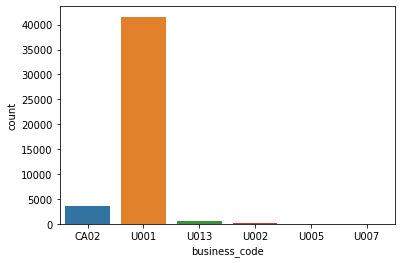

In [736]:
sns.countplot(x=train["business_code"],data=train)

**Inference** U001 has the highest occurrnce

## Multivariate Analysis

### Correlation

In [737]:
train.corr().loc['delay',:]

buisness_year       -0.012140
doc_id               0.174054
total_open_amount    0.009014
delay                1.000000
Name: delay, dtype: float64

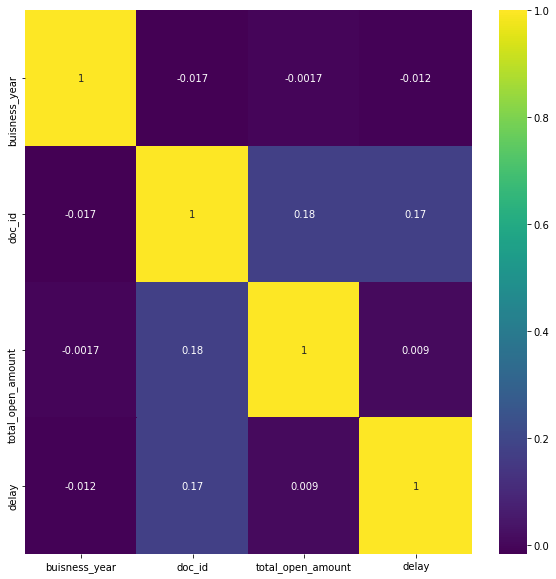

In [738]:
plt.figure(figsize=(10,10))
cor = train.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


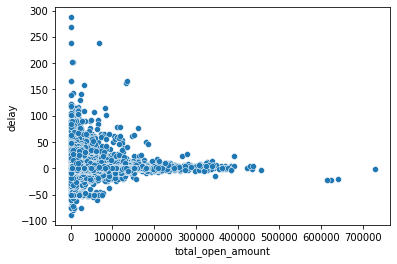

In [739]:
sns.scatterplot(train['total_open_amount'],train['delay'])

In [740]:
 #Here we can observe that even for low open amount some has delay of arround 400 days which is an outlier

**Inferecne** One can observe that even for low open amount some has delay of arround 400 days which is an outlier


<BarContainer object of 46039 artists>

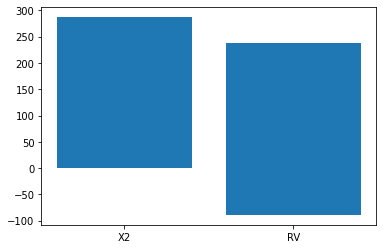

In [741]:
plt.bar(train['document type'],train['delay'])

**Inference** We can observe that the customer which are having X2 never payed on time but RV can pay early or late.

<BarContainer object of 46039 artists>

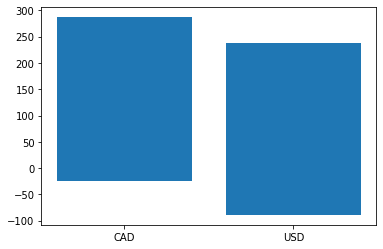

In [742]:
plt.bar(train['invoice_currency'],train['delay'])

**Inference** We can observe that the customer which are having CAD have almost never payed on time but USD can pay early or late.

In [743]:
test_set['business_code'].value_counts()

U001    3643
CA02     290
U013      16
U002      10
U005       2
Name: business_code, dtype: int64

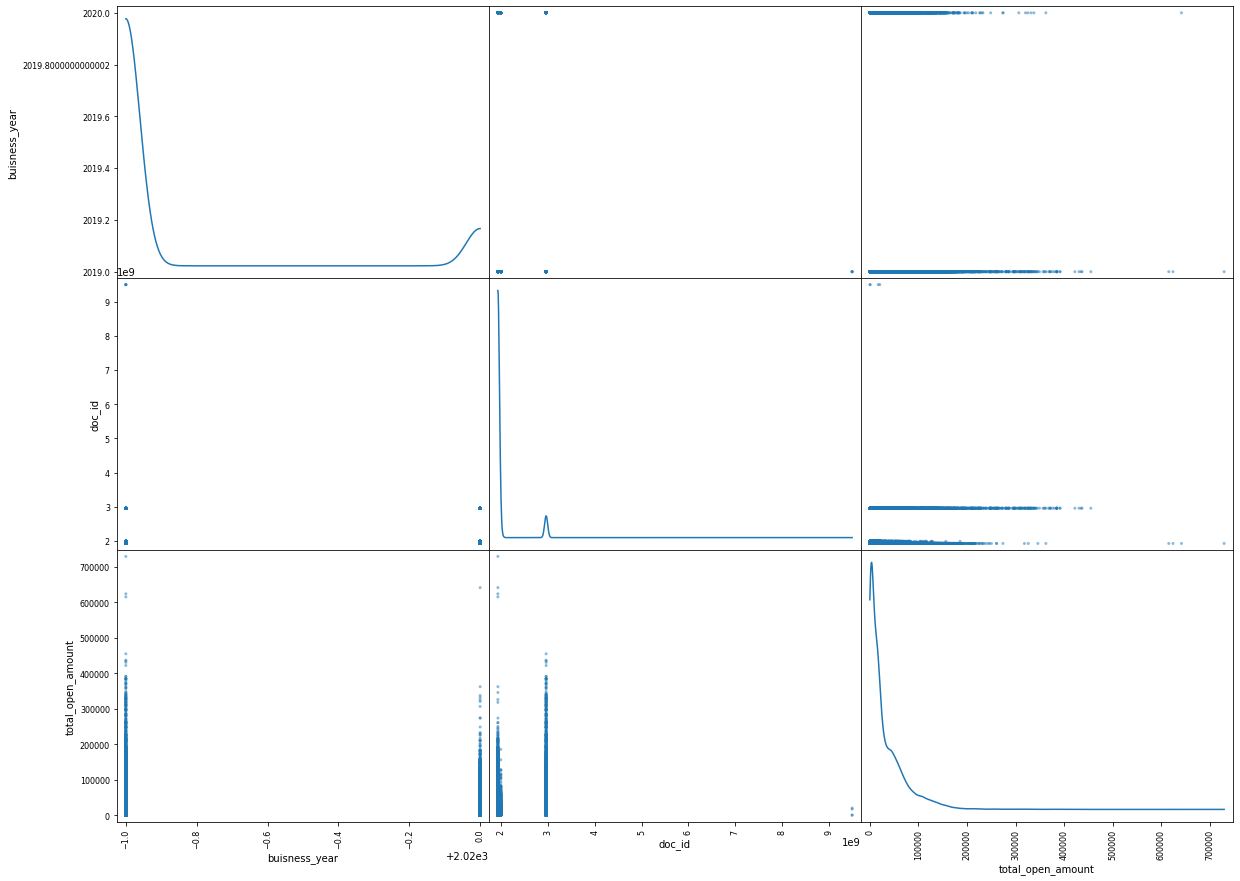

In [744]:
pd.plotting.scatter_matrix(train.loc[:, "business_code":"cust_payment_terms"], diagonal="kde",figsize=(20,15))
plt.show()

In [745]:
train.cov()

,buisness_year,doc_id,total_open_amount,delay
buisness_year,1.138558e-01,-1.626703e+06,-2.272881e+01,-4.501185e-02
doc_id,-1.626703e+06,8.285564e+16,2.029730e+12,5.505270e+08
total_open_amount,-2.272881e+01,2.029730e+12,1.590881e+09,3.950751e+03
delay,-4.501185e-02,5.505270e+08,3.950751e+03,1.207450e+02


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


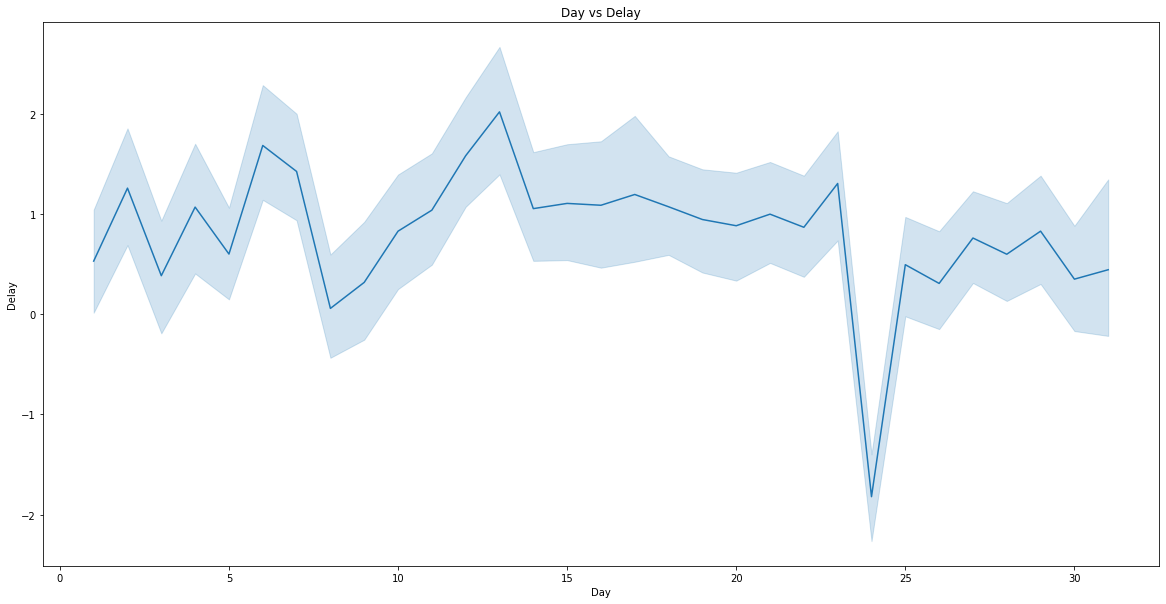

In [746]:
plt.figure(figsize=(20,10))
sns.lineplot(train['due_in_date'].dt.day, train['delay'])
plt.xlabel("Day")
plt.ylabel("Delay")
plt.title("Day vs Delay")
plt.show()

**Inference** Delay is vary less in 20 to 25 day of the month


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


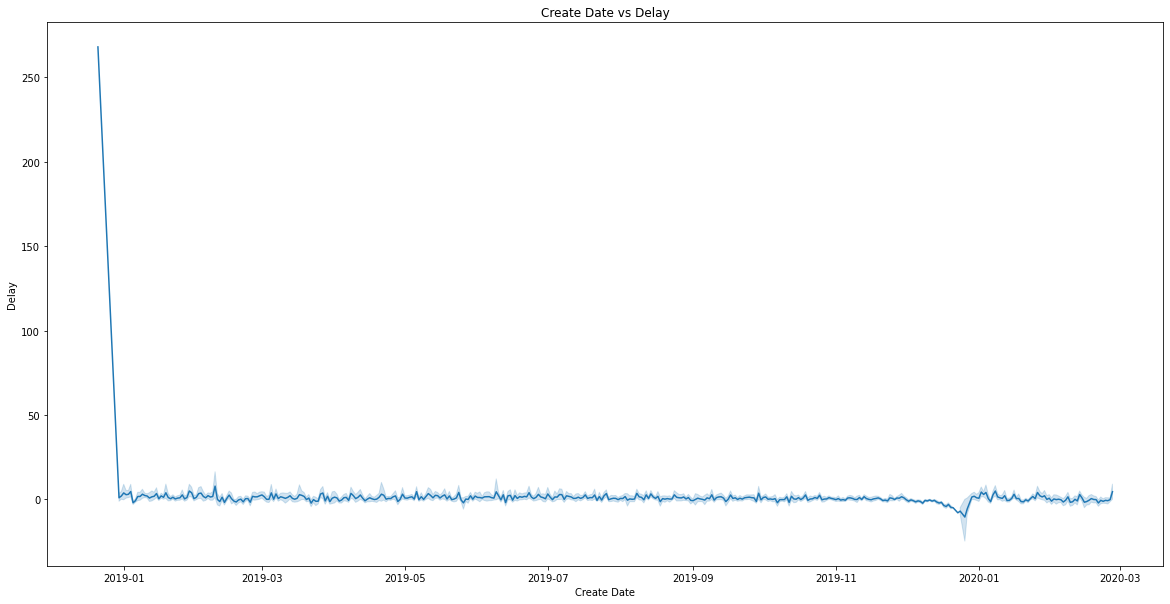

In [747]:
plt.figure(figsize=(20,10))
sns.lineplot(train['document_create_date.1'], train['delay'])
plt.xlabel("Create Date")
plt.ylabel("Delay")
plt.title("Create Date vs Delay")
plt.show()

**Inference** One can observe that delay is very high during initial phase of document create date


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


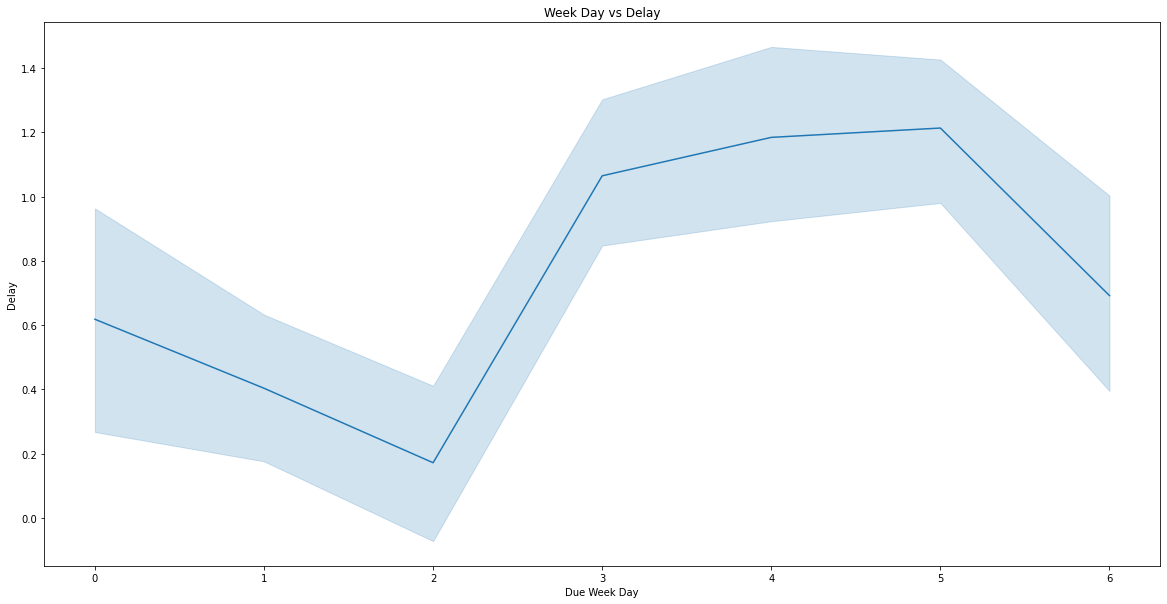

In [748]:
plt.figure(figsize=(20,10))
sns.lineplot(train['due_in_date'].dt.dayofweek, train['delay'])
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

**Inference** Delay is high on 3rd and 5th day of the week

## Feature Engineering and feature selection

### Outlier Detection and removal

In [749]:
train[train['due_in_date']<train['document_create_date.1']].shape

(110, 14)

**Inference** The above thing is not possible as due_in_date cant be less than create date hence it is an anomaly and outlier to our data.

In [750]:
train[train['clear_date']<train['document_create_date.1']].shape

(0, 14)

**Inference** The above thing is not possible as clear_date cant be less than document_create_date.1 hence it is an anomaly and outlier to our data.

In [751]:
train.shape

(46039, 14)

In [752]:
# Removing the above outlier from the train and validation set
train=train.drop(index=train[train['clear_date']<train['document_create_date.1']].index)
train=train.drop(index=train[train['due_in_date']<train['document_create_date.1']].index)
#val1=val1.drop(index=val1[x_val1['clear_date']<val1['document_create_date.1']].index)
#val1=val1.drop(index=val1[x_val1['due_in_date']<val1['document_create_date.1']].index)
#val2=val2.drop(index=val2[x_val2['clear_date']<val2['document_create_date.1']].index)
#val2=val2.drop(index=val2[x_val2['due_in_date']<val2['document_create_date.1']].index)

In [753]:
train.shape

(45929, 14)

### Label Encoding

In [754]:
doc_typ={ 'RV':1, 'X2':2 } #Label Encoding categorical column document type

In [755]:
train['document type']=train['document type'].map(doc_typ) #mapping the above to train, test and validation sets
#val1['document type']=val1['document type'].map(doc_typ)
#val2['document type']=val2['document type'].map(doc_typ)

In [756]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,delay
3987,CA02,0100054173,DIA corporation,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,CAD,2,255.00,CA10,268
28512,U001,0200726979,BJ'S,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,139.69,NAA8,1
23669,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,882.33,NAH4,-5
38468,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,146.25,NAA8,1
38432,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,21202.06,NAH4,-5


In [757]:
test_set["business_code"].unique()

array(['U001', 'CA02', 'U013', 'U005', 'U002'], dtype=object)

In [758]:
train["business_code"].unique()

array(['CA02', 'U001', 'U013', 'U002', 'U005', 'U007'], dtype=object)

In [759]:
invoice_document_enc={"U001":1,"CA02":2,"U002":3,"U013":4,"U005":5,"U007":6}
# Label Encoding business_code

In [760]:
train['business_code']=train['business_code'].map(invoice_document_enc) #mapping the above to train, test and validation sets
#val1['business_code']=val1['business_code'].map(invoice_document_enc)
#val2['business_code']=val2['business_code'].map(invoice_document_enc)


In [761]:
test_set['business_code']=test_set['business_code'].map(invoice_document_enc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [762]:
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,delay
3987,2,0100054173,DIA corporation,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,CAD,2,255.00,CA10,268
28512,1,0200726979,BJ'S,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,139.69,NAA8,1
23669,1,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,882.33,NAH4,-5
38468,1,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,146.25,NAA8,1
38432,1,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,21202.06,NAH4,-5


In [763]:

from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
train['cust_number'] = le.fit_transform(train['cust_number'])

In [764]:
#val1['cust_number']= le.fit_transform(val1['cust_number'])
#val2['cust_number']= le.fit_transform(val2['cust_number'])

In [765]:
train['cust_payment_terms'].dtype

dtype('O')

In [766]:
temp = train.groupby('name_customer')['delay'].agg(pd.Series.mean).to_dict()
train['name_customer'] = train['name_customer'].map(temp)
train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,delay
3987,2,311,268.000000,2019-09-25,2019.0,9.500000e+09,2019-03-29,2018-12-21,2018-12-31,CAD,2,255.00,CA10,268
28512,1,804,0.939024,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,139.69,NAA8,1
23669,1,908,-2.579592,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,882.33,NAH4,-5
38468,1,804,0.796296,2019-01-15,2019.0,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,146.25,NAA8,1
38432,1,908,-2.134538,2019-01-09,2019.0,1.928533e+09,2018-12-30,2018-12-30,2019-01-14,USD,1,21202.06,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6552,1,520,0.000000,2020-03-12,2020.0,1.930572e+09,2020-02-26,2020-02-26,2020-03-12,USD,1,11224.73,NAA8,0
2166,1,629,-1.629630,2020-03-13,2020.0,1.930548e+09,2020-02-27,2020-02-27,2020-03-13,USD,1,4171.53,NAA8,0
6496,2,466,9.452830,2020-03-18,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,CAD,1,12740.33,CA10,9
29053,1,892,-1.285714,2020-03-13,2020.0,1.930579e+09,2020-02-27,2020-02-27,2020-03-13,USD,1,17377.54,NAA8,0


### Extracting mixed variable 

In [767]:
train['cust_payment_terms_numb'] = train['cust_payment_terms'].str.extract('(\d+)')
train.drop('cust_payment_terms',axis=1,inplace=True)
#val1['cust_payment_terms_numb'] = val1['cust_payment_terms'].str.extract('(\d+)')
#val1.drop('cust_payment_terms',axis=1,inplace=True)
#val2['cust_payment_terms_numb'] = val2['cust_payment_terms'].str.extract('(\d+)')
#val2.drop('cust_payment_terms',axis=1,inplace=True)

In [768]:
q= train['cust_payment_terms_numb']
w = q.dropna()
w = w.astype(str).astype(int)
p=w.mean()

In [769]:
train['cust_payment_terms_numb']=train['cust_payment_terms_numb'].fillna(p)

In [770]:
train['cust_payment_terms_numb']=train['cust_payment_terms_numb'].astype(str).astype(float)

In [771]:
#val1['cust_payment_terms_numb']=val1['cust_payment_terms_numb'].astype(str).astype(float)


In [772]:
#val2['cust_payment_terms_numb']=val2['cust_payment_terms_numb'].astype(str).astype(float)

In [773]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45929 entries, 3987 to 7988
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   business_code            45929 non-null  int64         
 1   cust_number              45929 non-null  int64         
 2   name_customer            45929 non-null  float64       
 3   clear_date               45929 non-null  datetime64[ns]
 4   buisness_year            45929 non-null  float64       
 5   doc_id                   45929 non-null  float64       
 6   posting_date             45929 non-null  object        
 7   document_create_date.1   45929 non-null  datetime64[ns]
 8   due_in_date              45929 non-null  datetime64[ns]
 9   invoice_currency         45929 non-null  object        
 10  document type            45929 non-null  int64         
 11  total_open_amount        45929 non-null  float64       
 12  delay                    45929

In [774]:
train['clear_date_quater']=train['clear_date'].dt.quarter
#val1['clear_date_quater']=val1['clear_date'].dt.quarter
#val2['clear_date_quater']=val2['clear_date'].dt.quarter

In [775]:
train['clear_date_month']=train['clear_date'].dt.month
#val1['clear_date_month']=val1['clear_date'].dt.month
#val2['clear_date_month']=val2['clear_date'].dt.month

In [776]:
#train['create_date_month']=train['document_create_date.1'].dt.month
#val1['create_date_month']=val1['document_create_date.1'].dt.month
#val2['create_date_month']=val2['document_create_date.1'].dt.month

In [777]:
#train['create_date_quarter']=train['document_create_date.1'].dt.quarter
#val1['create_date_quarter']=val1['document_create_date.1'].dt.quarter
#val2['create_date_quarter']=val2['document_create_date.1'].dt.quarter

In [778]:
#train['due_date_quarter']=train['due_in_date'].dt.quarter
#val1['due_date_quarter']=val1['due_in_date'].dt.quarter
#val2['due_date_quarter']=val2['due_in_date'].dt.quarter

In [779]:
#train['due_date_month']=train['due_in_date'].dt.month
#val1['due_date_month']=val1['due_in_date'].dt.month
#val2['due_date_month']=val2['due_in_date'].dt.month

In [780]:
train['duration_of_pay']=train['due_in_date']-train['document_create_date.1']

In [781]:
import datetime as dt
train['duration_of_pay'] = train['duration_of_pay'].dt.days.astype('int64')

In [782]:
train['duration_of_pay'].dtype

dtype('int64')

In [783]:
#val1['duration_of_pay']=val1['due_in_date']-val1['document_create_date.1']
#val2['duration_of_pay']=val2['due_in_date']-val2['document_create_date.1']

In [784]:
#val1['duration_of_pay'] = val1['duration_of_pay'].dt.days.astype('int64')
#val2['duration_of_pay'] = val2['duration_of_pay'].dt.days.astype('int64')

In [785]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45929 entries, 3987 to 7988
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   business_code            45929 non-null  int64         
 1   cust_number              45929 non-null  int64         
 2   name_customer            45929 non-null  float64       
 3   clear_date               45929 non-null  datetime64[ns]
 4   buisness_year            45929 non-null  float64       
 5   doc_id                   45929 non-null  float64       
 6   posting_date             45929 non-null  object        
 7   document_create_date.1   45929 non-null  datetime64[ns]
 8   due_in_date              45929 non-null  datetime64[ns]
 9   invoice_currency         45929 non-null  object        
 10  document type            45929 non-null  int64         
 11  total_open_amount        45929 non-null  float64       
 12  delay                    45929

In [786]:
train.drop(["document_create_date.1","clear_date","due_in_date", "name_customer"],axis=1,inplace=True)
#val1.drop(["document_create_date.1","clear_date","due_in_date"],axis=1,inplace=True)
#val2.drop(["document_create_date.1","clear_date","due_in_date"],axis=1,inplace=True)

In [787]:
#train.info()

In [788]:
#train.isna().sum()

In [789]:
y=train['delay']
x=train.drop(['delay', 'clear_date_quater','clear_date_month', "posting_date"],inplace=False,axis=1)
#checking shape of each dataframe
x.shape,y.shape,train.shape

((45929, 9), (45929,), (45929, 13))

In [790]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.3,random_state=0)
#checking the shape confirms the data is splited correctly in 70,30 percent for train and test respectively
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32150, 9), (13779, 9), (32150,), (13779,))

In [791]:
x_val1,x_val2,y_val1,y_val2=train_test_split(x_test,y_test,shuffle=False,test_size=0.5,random_state=0)
x_val1.shape,x_val2.shape,y_val1.shape,y_val2.shape

((6889, 9), (6890, 9), (6889,), (6890,))

In [792]:
train1=train.copy()

In [793]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45929 entries, 3987 to 7988
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   business_code            45929 non-null  int64  
 1   cust_number              45929 non-null  int64  
 2   buisness_year            45929 non-null  float64
 3   doc_id                   45929 non-null  float64
 4   posting_date             45929 non-null  object 
 5   invoice_currency         45929 non-null  object 
 6   document type            45929 non-null  int64  
 7   total_open_amount        45929 non-null  float64
 8   delay                    45929 non-null  int64  
 9   cust_payment_terms_numb  45929 non-null  float64
 10  clear_date_quater        45929 non-null  int64  
 11  clear_date_month         45929 non-null  int64  
 12  duration_of_pay          45929 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 4.9+ MB


In [794]:
train1.drop(['posting_date','invoice_currency'],inplace=True,axis=1)

In [795]:
#train1.drop(['cust_payment_terms_numb'],inplace=True,axis=1)

In [796]:
train.corr().loc['delay',:]

business_code              0.146619
cust_number                0.100291
buisness_year             -0.011839
doc_id                     0.171692
document type              0.157749
total_open_amount          0.008128
delay                      1.000000
cust_payment_terms_numb   -0.029820
clear_date_quater          0.039108
clear_date_month           0.045654
duration_of_pay           -0.217665
Name: delay, dtype: float64

In [797]:
train.head()

,business_code,cust_number,buisness_year,doc_id,posting_date,invoice_currency,document type,total_open_amount,delay,cust_payment_terms_numb,clear_date_quater,clear_date_month,duration_of_pay
3987,2,311,2019.0,9.500000e+09,2019-03-29,CAD,2,255.00,268,10.0,3,9,10
28512,1,804,2019.0,1.928538e+09,2018-12-30,USD,1,139.69,1,8.0,1,1,15
23669,1,908,2019.0,1.928538e+09,2018-12-30,USD,1,882.33,-5,4.0,1,1,15
38468,1,804,2019.0,1.928537e+09,2018-12-30,USD,1,146.25,1,8.0,1,1,15
38432,1,908,2019.0,1.928533e+09,2018-12-30,USD,1,21202.06,-5,4.0,1,1,15


In [798]:
y=train1['delay']
x=train1.drop(['delay', 'clear_date_quater','clear_date_month'],inplace=False,axis=1)
#checking shape of each dataframe
x.shape,y.shape,train1.shape

((45929, 8), (45929,), (45929, 11))

In [799]:
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.3,random_state=0)
#checking the shape confirms the data is splited correctly in 70,30 percent for train and test respectively
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32150, 8), (13779, 8), (32150,), (13779,))

In [800]:
x_val1,x_val2,y_val1,y_val2=train_test_split(x_test,y_test,shuffle=False,test_size=0.5,random_state=0)
x_val1.shape,x_val2.shape,y_val1.shape,y_val2.shape

((6889, 8), (6890, 8), (6889,), (6890,))

In [801]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [802]:
y_pred=lr.predict(x_val1)

In [803]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val1, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val1, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val1, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_val1, y_pred), 2))

Mean absolute error = 3.96
Mean squared error = 39.46
Median absolute error = 2.66
Explain variance score = 0.15
R2 score = 0.14


In [804]:
y_pred3=lr.predict(x_val2)

In [805]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, y_pred3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, y_pred3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, y_pred3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, y_pred3), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, y_pred3), 2))

Mean absolute error = 4.91
Mean squared error = 83.8
Median absolute error = 2.86
Explain variance score = 0.17
R2 score = 0.17


# Prediction

In [845]:
X_test = test_set.drop(['posting_id', 'area_business', 'document_create_date', 'isOpen', 'invoice_id', 'baseline_create_date'], axis=1)

In [846]:
X_test=X_test.drop(index=X_test[X_test['due_in_date']<X_test['document_create_date.1']].index)

In [847]:
doc_typ= { 'RV':1, 'X2':2 }
X_test['document type'] = X_test['document type'].map(doc_typ)

In [848]:
invoice_document_enc={"U001":1,"CA02":2,"U002":3,"U013":4,"U005":5,"U007":6}
X_test['business_code']=X_test['business_code'].map(invoice_document_enc)

In [849]:
X_test['cust_number'] = le.fit_transform(X_test['cust_number'])
temp = X_test.groupby('name_customer')['delay'].agg(pd.Series.mean).to_dict()

In [850]:
X_test['name_customer'] = X_test['name_customer'].map(temp)
X_test['cust_payment_terms_numb'] = X_test['cust_payment_terms'].str.extract('(\d+)')
X_test.drop('cust_payment_terms',axis=1,inplace=True)

In [852]:
q = X_test['cust_payment_terms_numb']
w = q.dropna()
w = w.astype(str).astype(int)
p = w.mean()

In [853]:
X_test['cust_payment_terms_numb']=X_test['cust_payment_terms_numb'].fillna(p)
X_test['cust_payment_terms_numb']=X_test['cust_payment_terms_numb'].astype(str).astype(float)
X_test['duration_of_pay']=X_test['due_in_date']-X_test['document_create_date.1']
X_test['duration_of_pay'] = X_test['duration_of_pay'].dt.days.astype('int64')

In [854]:
X_test = X_test.drop(["document_create_date.1","clear_date","due_in_date","name_customer"],axis=1,inplace=False)
X_test=X_test.drop('delay',inplace=False,axis=1)

In [856]:
X_test = X_test.drop(['invoice_currency', 'posting_date', ], axis=1)
X_test

,business_code,cust_number,buisness_year,doc_id,document type,total_open_amount,cust_payment_terms_numb,duration_of_pay
46643,1,201,2020.0,1.930578e+09,1,14465.24,32.0,32
49615,1,463,2020.0,1.930571e+09,1,29376.00,2.0,35
47527,1,140,2020.0,1.930577e+09,1,16462.80,8.0,15
47285,1,326,2020.0,1.930549e+09,1,9975.34,8.0,15
49321,1,178,2020.0,1.930567e+09,1,32979.53,8.0,15
...,...,...,...,...,...,...,...,...
47947,1,274,2020.0,1.930904e+09,1,28049.25,8.0,15
47295,2,86,2020.0,2.960634e+09,1,5607.95,10.0,12
47452,1,368,2020.0,1.930898e+09,1,14698.55,8.0,15
48236,1,271,2020.0,1.930915e+09,1,21362.82,8.0,15


In [842]:
test_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,delay,cust_payment_terms_numb,duration_of_pay
46643,1,201,NaT,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-30,USD,1,14465.24,NaT,32.0,32
49615,1,463,NaT,NaT,2020.0,1.930571e+09,2020-02-27,2020-02-27,2020-04-02,USD,1,29376.00,NaT,2.0,35
47527,1,140,NaT,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,1,16462.80,NaT,8.0,15
47285,1,326,NaT,NaT,2020.0,1.930549e+09,2020-02-27,2020-02-27,2020-03-13,USD,1,9975.34,NaT,8.0,15
49321,1,178,NaT,NaT,2020.0,1.930567e+09,2020-02-27,2020-02-27,2020-03-13,USD,1,32979.53,NaT,8.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47947,1,274,NaT,NaT,2020.0,1.930904e+09,2020-05-14,2020-05-14,2020-05-29,USD,1,28049.25,NaT,8.0,15
47295,2,86,NaT,NaT,2020.0,2.960634e+09,2020-05-15,2020-05-15,2020-05-27,CAD,1,5607.95,NaT,10.0,12
47452,1,368,NaT,NaT,2020.0,1.930898e+09,2020-05-16,2020-05-16,2020-05-31,USD,1,14698.55,NaT,8.0,15
48236,1,271,NaT,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-06-02,USD,1,21362.82,NaT,8.0,15


In [858]:
predicted_delay = lr.predict(X_test)

In [871]:
predicted_delay = predicted_delay.astype(int)
due_date = test_set.due_in_date.to_numpy()
indices = test_set.invoice_id
open_amt = test_set.total_open_amount


In [872]:
output_df = []
for idx, dd, amt, delay in zip(indices, due_date, open_amt, predicted_delay):
  bucket = '0-15 days'
  if delay > 15 and delay < 31:
    bucket = "31-45 days"
  if delay > 45:
    bucket = ">60 days"
  
  dd_ = datetime.datetime.strptime(str(dd)[:10], "%Y-%M-%d")


  output_df.append([idx,  str(dd)[:10], amt, (dd_ + datetime.timedelta(days=int(delay))).strftime("%Y-%M-%d"), bucket])

output_df = pd.DataFrame(output_df, columns=["Invoice No", "Due Date", "Actual Open Amt($)", "Payment Date", "Aging Bucket"])

In [873]:
output_df

,Invoice No,Due Date,Actual Open Amt($),Payment Date,Aging Bucket
0,1.930578e+09,2020-03-30,14465.24,2020-03-22,0-15 days
1,1.930571e+09,2020-04-02,29376.00,2019-04-27,0-15 days
2,1.930577e+09,2020-03-13,16462.80,2020-03-08,0-15 days
3,1.930549e+09,2020-03-13,9975.34,2020-03-10,0-15 days
4,1.930567e+09,2020-03-13,32979.53,2020-03-08,0-15 days
...,...,...,...,...,...
3947,1.930885e+09,2020-05-27,13543.73,2020-05-23,0-15 days
3948,1.930885e+09,2020-05-27,4516.69,2020-05-30,0-15 days
3949,1.930884e+09,2020-05-27,10151.17,2020-05-24,0-15 days
3950,1.930885e+09,2020-05-27,34279.58,2020-05-23,0-15 days


In [874]:
output_df.to_csv("clear_date_prediction.csv", index=False)